# Practica de Visualización

Un dataset de NOAA está almacenado en el archivo `data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


Primero leemos el archivo

In [3]:
df = pd.read_csv("../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


Cambiamos el tipo de dato a fecha y creamos nuevas columnas

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month_day'] = df['Date'].dt.strftime('%m-%d')

Sacamos los 29 de Febrero

In [5]:
df = df[df['Month_day'] != '02-29']

Armamos los períodos del 2005 al 2014. Y el 2015.

In [6]:
dfhist = df[(df['Year'] >= 2005) & (df['Year'] <= 2014)]
df2015 = df[df['Year'] == 2015]

Calculamos los records históricos.

In [8]:
tmax = dfhist[dfhist['Element'] == 'TMAX'].groupby('Month_day')['Data_Value'].max()
tmin = dfhist[dfhist['Element'] == 'TMIN'].groupby('Month_day')['Data_Value'].min()

Ahora los valores del 2015

In [9]:
tmax_2015 = df2015[df2015['Element'] == 'TMAX'].groupby('Month_day')['Data_Value'].max()
tmin_2015 = df2015[df2015['Element'] == 'TMIN'].groupby('Month_day')['Data_Value'].min()

Buscamos los días en los que se hayan roto los records

In [12]:
record_max_2015 = tmax_2015[tmax_2015 > tmax]
record_min_2015 = tmin_2015[tmin_2015 < tmin]

Ahora creamos el gráfico

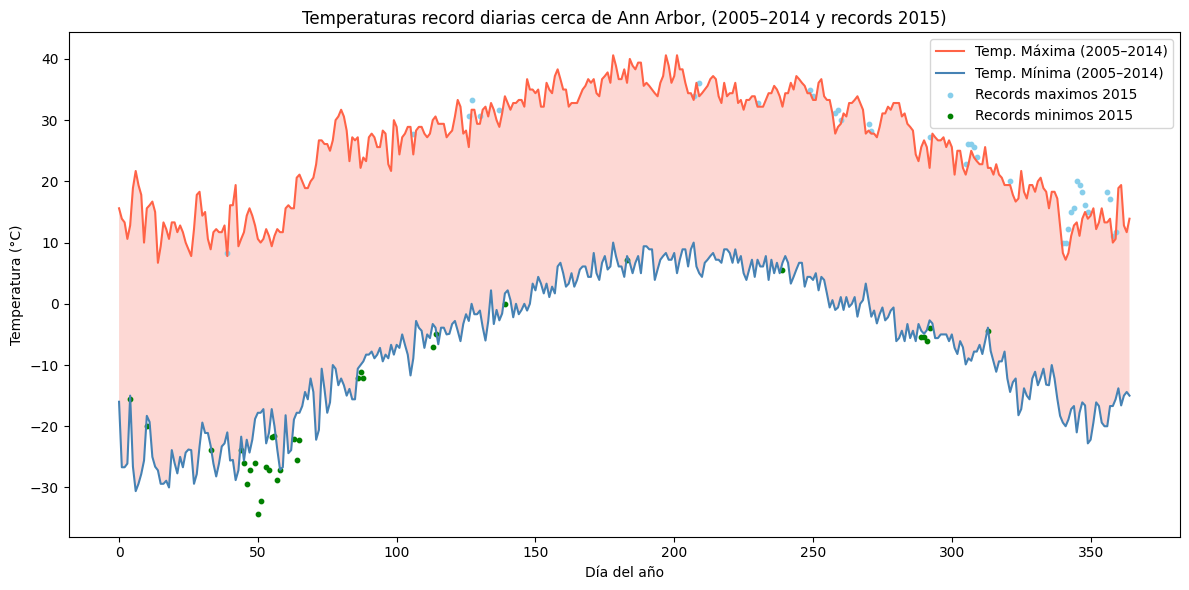

In [15]:
plt.figure(figsize=(12,6))
plt.plot(tmax.values / 10, label='Temp. Máxima (2005–2014)', color='tomato')
plt.plot(tmin.values / 10, label='Temp. Mínima (2005–2014)', color='steelblue')

plt.fill_between(range(len(tmax)),
                 tmin.values / 10,
                 tmax.values / 10,
                 facecolor='salmon', alpha=0.3)

plt.scatter(record_max_2015.index.map(lambda x: list(tmax.index).index(x)),
            record_max_2015.values / 10,
            color='skyblue', s=10, label='Records maximos 2015')
plt.scatter(record_min_2015.index.map(lambda x: list(tmin.index).index(x)),
            record_min_2015.values / 10,
            color='green', s=10, label='Records minimos 2015')

plt.title('Temperaturas record diarias cerca de Ann Arbor, (2005–2014 y records 2015)')
plt.xlabel('Día del año')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='best')
plt.tight_layout()

plt.show()